In [6]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [7]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

In [8]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [9]:
df.sample(n = 5)

,Ticker,Date,Adj Close,Close,High,Low,Open,Volume,Year,Close_lag_1,Returns
277090,NVDA,2023-12-04 00:00:00+00:00,45.493099,45.509998,46.077000,45.009998,46.077000,437543000.0,2023,46.764999,-0.026836
307081,PTC,2017-11-03 00:00:00+00:00,66.250000,66.250000,66.629997,65.400002,66.500000,1012300.0,2017,66.449997,-0.003010
349430,TDY,2010-10-12 00:00:00+00:00,41.150002,41.150002,41.299999,40.259998,40.970001,68600.0,2010,40.959999,0.004639
314095,QCOM,2020-09-01 00:00:00+00:00,110.929207,122.010002,122.570000,119.510002,121.080002,9091900.0,2020,119.099998,0.024433
286501,ON,2011-03-22 00:00:00+00:00,9.760000,9.760000,9.840000,9.680000,9.840000,8098500.0,2011,9.890000,-0.013145


In [10]:
select_tickers = df['Ticker'].unique().tolist()[0:9]
#select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['AAPL', 'ACN', 'ADBE', 'ADI', 'ADSK', 'AKAM', 'AMAT', 'AMD', 'ANET']

In [11]:
idx = df['Ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5674, 11), (56736, 11))

Look at the distribution of tickers.

<Axes: xlabel='Ticker'>

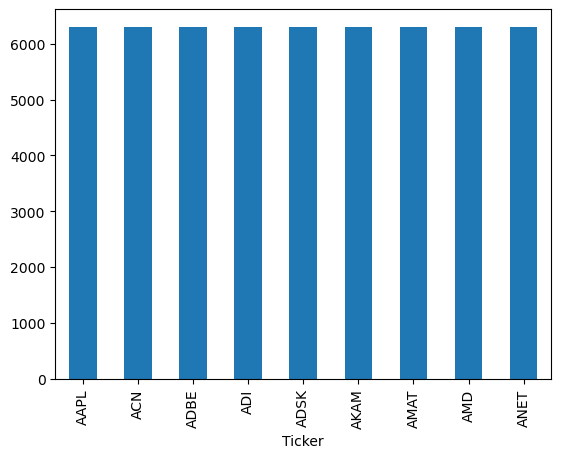

In [12]:
small_df['Ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='Ticker'>

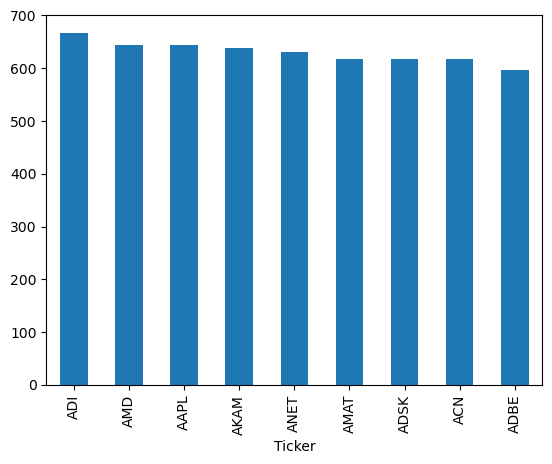

In [13]:
simple_sample_dt['Ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='Ticker'>

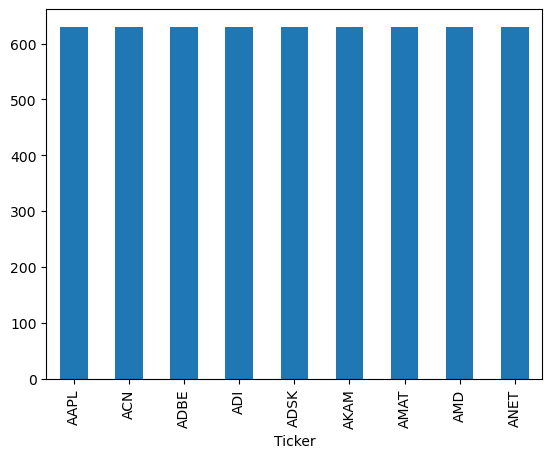

In [14]:
strat_sample_dt = small_df.groupby(['Ticker']).sample(frac = 0.1)
strat_sample_dt['Ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\jcp_2\AppData\Local\Temp\ipykernel_38524\2388710987.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='Ticker'>

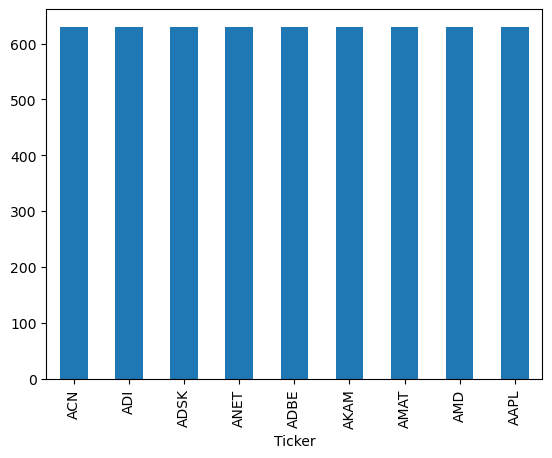

In [15]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('Ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['Ticker'].isin(select_tickers)]['Ticker'].value_counts().plot(kind='bar')